# Multiple Linear Regression
- This is a python code for multiple linear regression of 50_startups.
- This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [63]:
# Load the dataframe
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [65]:
df.shape

(50, 5)

In [66]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [67]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [68]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [71]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [72]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [73]:
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

In [74]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost at epoch 0 is: 6989316078.6237135
Cost at epoch 1500 is: 93910079.250253
Cost at epoch 3000 is: 52213406.46017957
Cost at epoch 4500 is: 44053387.93102422
Cost at epoch 6000 is: 41718884.2933599
Cost at epoch 7500 is: 41048136.36983321
Cost at epoch 9000 is: 40855409.29807189
Cost at epoch 10500 is: 40800032.69430475
Cost at epoch 12000 is: 40784121.23860738
Cost at epoch 13500 is: 40779549.37241818


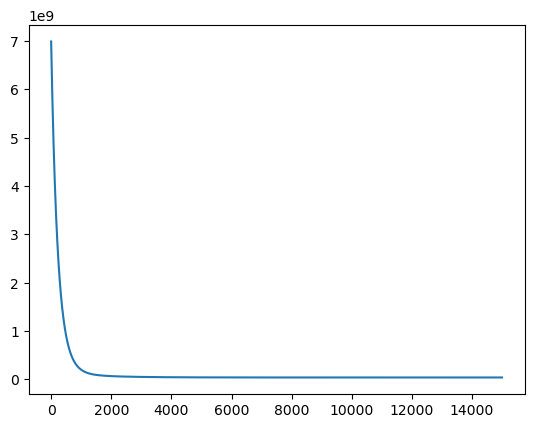

In [75]:
plt.plot(c)

In [76]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [77]:
# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual Value': Ytest, 'Predicted Value': y_pred})
print(results)

    Actual Value  Predicted Value
0      134307.35    126193.339294
1       81005.76     85778.287892
2       99937.59     99712.268818
3       64926.08     45687.011148
4      125370.37    127083.381967
5       35673.41     51822.143085
6      105733.54    109074.551147
7      107404.34    100588.066343
8       97427.84     97896.911485
9      122776.86    111646.966726
10     141585.52    128797.163316
11     166187.94    174150.506905
12      89949.14     93707.592448
13     152211.77    148391.468895
14     182901.99    172310.083147


In [78]:
mse = np.mean((Ytest-y_pred)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Ytest-y_pred))
total_variance = np.sum((Ytest-np.mean(Ytest))**2)
r_squared = 1-(mse/total_variance)

print(f"Mean Squared Error (MSE): {mse_value}")
print(f"Mean Absolute Error (MAE): {mae_value}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"R squared:{r_squared}")

Mean Squared Error (MSE): 84806327.42054987
Mean Absolute Error (MAE): 7392.700482784527
Root Mean Squared Error (RMSE): 9209.035097150509
R squared:0.9959816978021541


- This high R-square value indicates model is perfectly fit for the dataset

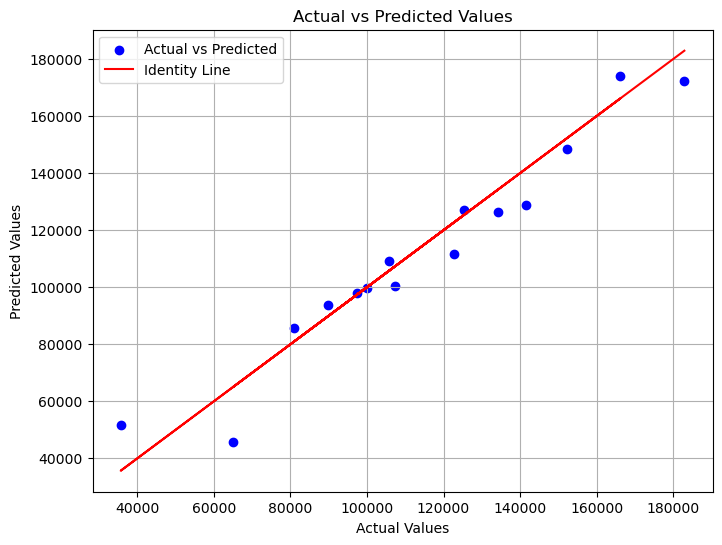

In [79]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Ytest, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(Ytest, Ytest, color='red', label='Identity Line')  # Identity line (where actual equals predicted)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()